<center><h2>INDIAN LIVER PATIENT NOTEBOOK</h2></center>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

<h2>Loading Dataset</h2>

In [2]:
col=['Age','Gender','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio','Selector']
df=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=col)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<h2>Replacing NaN values with 0</h2>

In [3]:
df['A/G Ratio'].fillna(0.0,inplace=True)
df['Selector']=df['Selector'].map({1:0,2:1})
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

In [4]:
df.head(20)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,0
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,1
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,0


<h2>One Hot encoding categorical values</h2>

In [5]:
df2=pd.get_dummies(data=df,columns=['Gender'])
df2.head(20)

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,True,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,False,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,False,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,False,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,False,True
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,0,False,True
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0,True,False
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,0,True,False
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,1,False,True
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,0,False,True


In [6]:
df2.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<h2>Visualizing data</h2>

<Axes: xlabel='TB', ylabel='Count'>

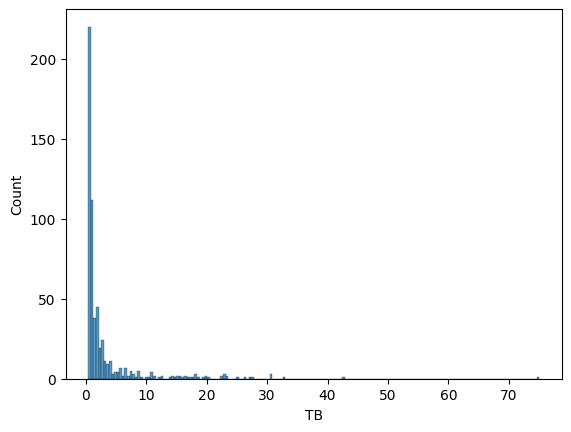

In [7]:
sn.histplot(x='TB',data=df2)

<Axes: xlabel='TP'>

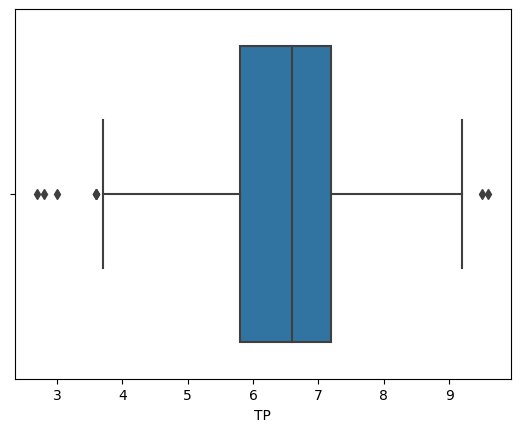

In [8]:
sn.boxplot(x='TP',data=df2)

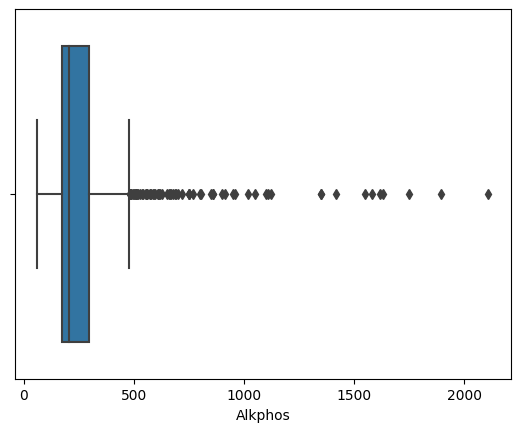

In [9]:
ax=sn.boxplot(x='Alkphos',data=df2)

<Axes: xlabel='Sgot'>

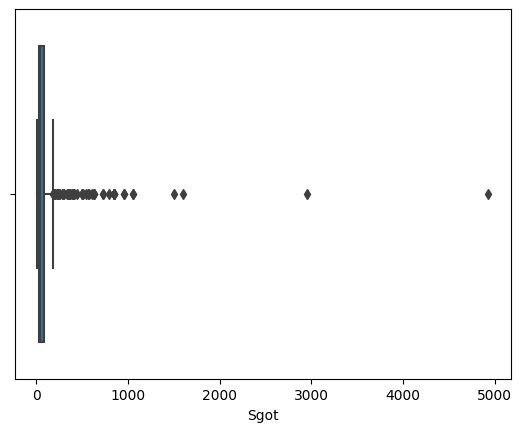

In [10]:
sn.boxplot(x='Sgot',data=df2)

In [11]:
col=['Age','Gender_Male','Gender_Female','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio','Selector']
Y_col=[col[-1]]
col.pop()
X_col=col
print(X_col,Y_col)

['Age', 'Gender_Male', 'Gender_Female', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio'] ['Selector']


In [12]:
df2.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,True,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,False,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,False,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,False,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,False,True


<h2>Detecting and Removing Outliers</h2>

In [13]:
from scipy.stats import zscore
df2['Sgpt_zscore']=zscore(df2['Sgpt'])
df2['isnot_outlier']=df2['Sgpt_zscore'].apply(lambda x:x >=-2.5 and x<=2.5)
df2['Alk_zscore']=zscore(df2['Alkphos'])
df2['isAnot_outlier']=df2['Alk_zscore'].apply(lambda x:x >=-2.5 and x<=2.5)
df2['Sgot_zscore']=zscore(df2['Sgot'])
df2['isSnot_outlier']=df2['Sgot_zscore'].apply(lambda x:x >=-2.5 and x<=2.5)
df2.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Female,Gender_Male,Sgpt_zscore,isnot_outlier,Alk_zscore,isAnot_outlier,Sgot_zscore,isSnot_outlier
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,True,False,-0.354665,True,-0.426715,True,-0.318393,True
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,False,True,-0.091599,True,1.682629,True,-0.034333,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,False,True,-0.113522,True,0.821588,True,-0.145186,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,False,True,-0.365626,True,-0.447314,True,-0.311465,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,False,True,-0.294379,True,-0.393756,True,-0.176363,True


In [14]:
df2=df2[(df2['isAnot_outlier']==True) & (df2['isSnot_outlier']==True) & (df2['isnot_outlier']==True)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 582
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             550 non-null    int64  
 1   TB              550 non-null    float64
 2   DB              550 non-null    float64
 3   Alkphos         550 non-null    int64  
 4   Sgpt            550 non-null    int64  
 5   Sgot            550 non-null    int64  
 6   TP              550 non-null    float64
 7   ALB             550 non-null    float64
 8   A/G Ratio       550 non-null    float64
 9   Selector        550 non-null    int64  
 10  Gender_Female   550 non-null    bool   
 11  Gender_Male     550 non-null    bool   
 12  Sgpt_zscore     550 non-null    float64
 13  isnot_outlier   550 non-null    bool   
 14  Alk_zscore      550 non-null    float64
 15  isAnot_outlier  550 non-null    bool   
 16  Sgot_zscore     550 non-null    float64
 17  isSnot_outlier  550 non-null    bool   


<h2>Splitting Dataframe into feature and target variable</h2>

In [15]:

X=df2[X_col]
Y=df2['Selector']


<h2>Splitting Dataset into Train and Test</h2>

In [16]:

scal=MinMaxScaler()
X=scal.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(440, 11) (110, 11)


<h2>MODEL</h2>

In [17]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score ,classification_report
rf_class=RandomForestClassifier(n_estimators=100,max_depth=50,random_state=42)

rf_class.fit(X_train, Y_train)
print(accuracy_score(Y_test,rf_class.predict(X_test)))

0.7909090909090909


<h2>Accuracy,Precision,Recall</h2>

In [18]:
print(classification_report(Y_test,rf_class.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.64      0.48      0.55        29

    accuracy                           0.79       110
   macro avg       0.73      0.69      0.71       110
weighted avg       0.78      0.79      0.78       110



<h2>PREDICTIONS</h2>

In [19]:

pred={'predicted':rf_class.predict(X_test),'Actual':Y_test}
df3=pd.DataFrame(pred)
df3['predicted']=df3['predicted'].map({0:1,1:2})
df3['Actual']=df3['Actual'].map({0:1,1:2})

df3.head(15)

,predicted,Actual
218,2,2
85,1,1
513,1,1
123,2,1
555,1,1
565,1,1
91,1,1
393,1,1
148,2,1
389,1,1


<h2>CONFUSION MATRIX</h2>

Text(95.72222222222221, 0.5, 'Truth')

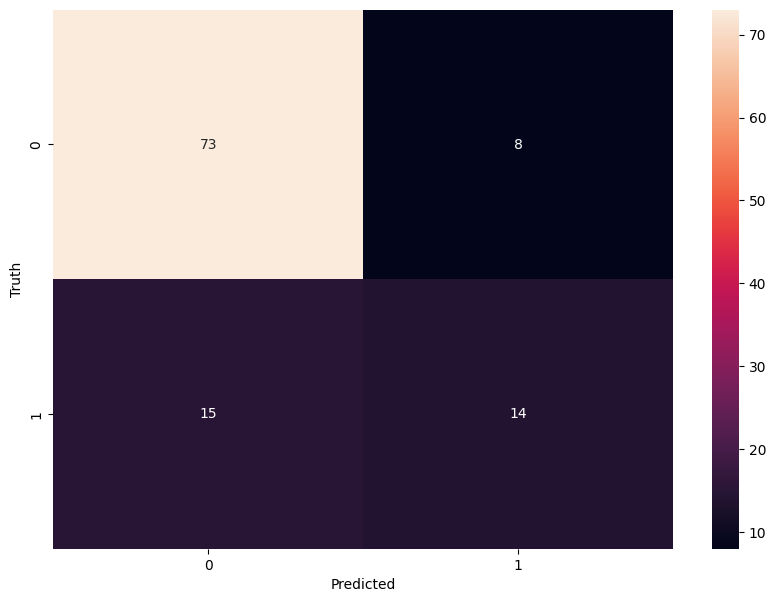

In [20]:

import tensorflow as tf
cm=tf.math.confusion_matrix(labels=df3['Actual'],predictions=df3['predicted'])
cm=cm[1:,1:]
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

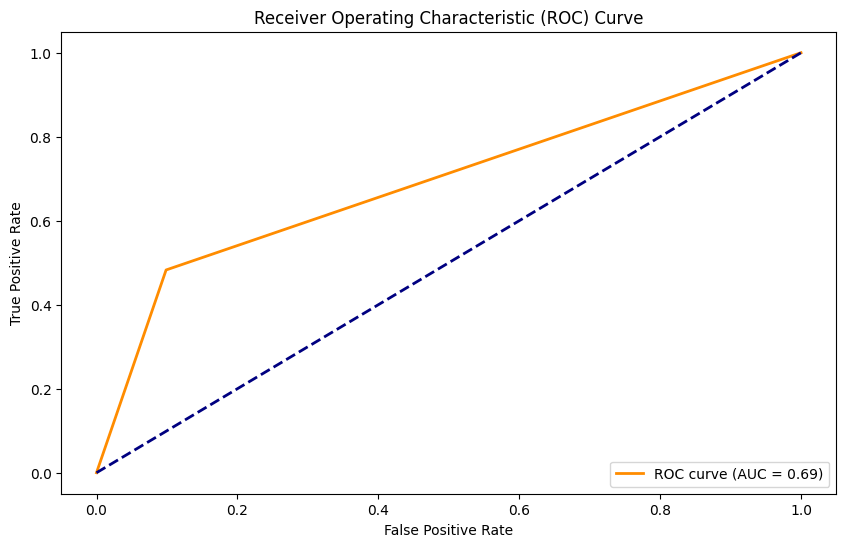

In [21]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, rf_class.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




